<a href="https://colab.research.google.com/github/Shachi1505/Parkinson-Detection/blob/main/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detection of Parkinson's Disease Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 **Step 1: Collection aand Analysis**

In [ ]:
data = pd.read_csv('parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data.shape)
print(data.info())

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    

194 rows means this no. of patients and 24 columns or parameters to evaluate dataset

In [ ]:
data.isnull().sum() #looks for missing value

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [ ]:
for i in data.columns:
    print("**********", i, "**********")
    print()
    print(set(data[i].tolist()))
    print()

********** name **********

{'phon_R01_S37_1', 'phon_R01_S02_3', 'phon_R01_S07_6', 'phon_R01_S10_5', 'phon_R01_S34_1', 'phon_R01_S50_6', 'phon_R01_S19_3', 'phon_R01_S21_4', 'phon_R01_S20_2', 'phon_R01_S22_5', 'phon_R01_S43_2', 'phon_R01_S01_6', 'phon_R01_S01_1', 'phon_R01_S50_4', 'phon_R01_S27_3', 'phon_R01_S35_5', 'phon_R01_S05_5', 'phon_R01_S20_5', 'phon_R01_S22_1', 'phon_R01_S22_3', 'phon_R01_S34_5', 'phon_R01_S06_1', 'phon_R01_S35_7', 'phon_R01_S07_1', 'phon_R01_S42_2', 'phon_R01_S39_4', 'phon_R01_S06_2', 'phon_R01_S04_3', 'phon_R01_S10_3', 'phon_R01_S13_3', 'phon_R01_S32_3', 'phon_R01_S24_3', 'phon_R01_S44_4', 'phon_R01_S50_1', 'phon_R01_S06_3', 'phon_R01_S05_1', 'phon_R01_S07_4', 'phon_R01_S31_5', 'phon_R01_S26_2', 'phon_R01_S02_4', 'phon_R01_S44_5', 'phon_R01_S06_6', 'phon_R01_S16_1', 'phon_R01_S21_3', 'phon_R01_S27_6', 'phon_R01_S04_4', 'phon_R01_S20_6', 'phon_R01_S31_6', 'phon_R01_S39_2', 'phon_R01_S43_6', 'phon_R01_S37_2', 'phon_R01_S31_2', 'phon_R01_S37_4', 'phon_R01_S37_3',

In [ ]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [ ]:
data['status'].value_counts()
# 0 is healthy people
# 1 healthy people

status
1    147
0     48
Name: count, dtype: int64

**Step 2: Data Preprocessing**

In [ ]:
#Removing independent variables
x = data.drop(columns=['name','status'], axis=1)
#Choose target
y = data['status']
print(x)
print(y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
#splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape) #status

(195, 22) (156, 22) (39, 22)
(195,) (156,) (39,)


**Step 3: Standardization**

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Step 4: Model Implementation**

### Predicting Model using Support Vector Machine(SVM) Algo

In [ ]:
# 24 cols so 24 dimensions will be formed by SVM to segregate data
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [ ]:
#accuracy score on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


*Building a Predictive System*

In [ ]:
input_data = (119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654)
#took a random dataset of any user and now we predict if he/she has parkinson or not
input_data_as_numpy_array = np.asarray(input_data)

#reshape numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction == 1):
    print('The Person has Parkinsons Disease')
else:
    print('The Person does not have Parkinsons Disease')

The Person has Parkinsons Disease


# Visualising Dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os, sys
os.getcwd()
import plotly.offline
import plotly as py


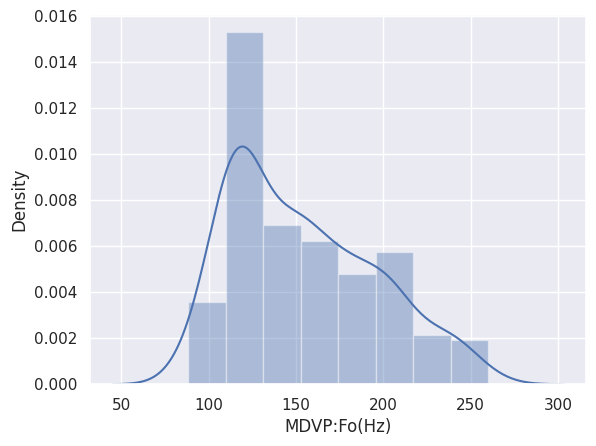

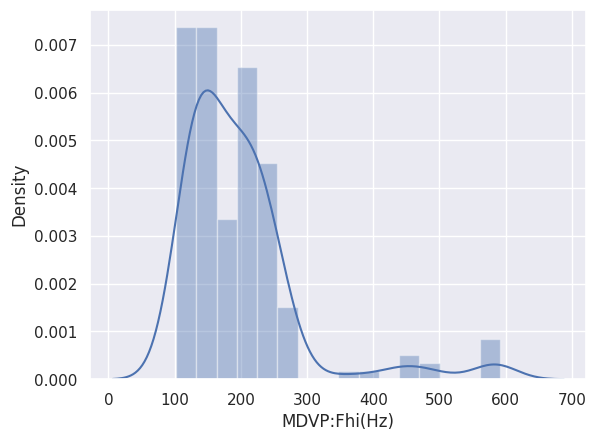

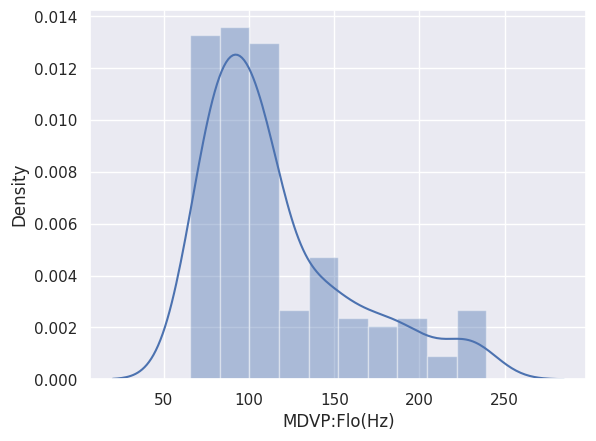

In [ ]:
#find the distribution of dataset
def distplot(col):
  sb.distplot(data[col])
  plt.show()

for i in list(data.columns[1:4]):
  distplot(i)
#MDVP:Fo(Hz), MDVP:Fhi(Hz), and MDVP:Flo(Hz) represent the average, highest, and lowest fundamental
#frequencies of vocal cord vibrations in Hz, respectively, as measured by the Multi-Dimensional Voice Program (MDVP).

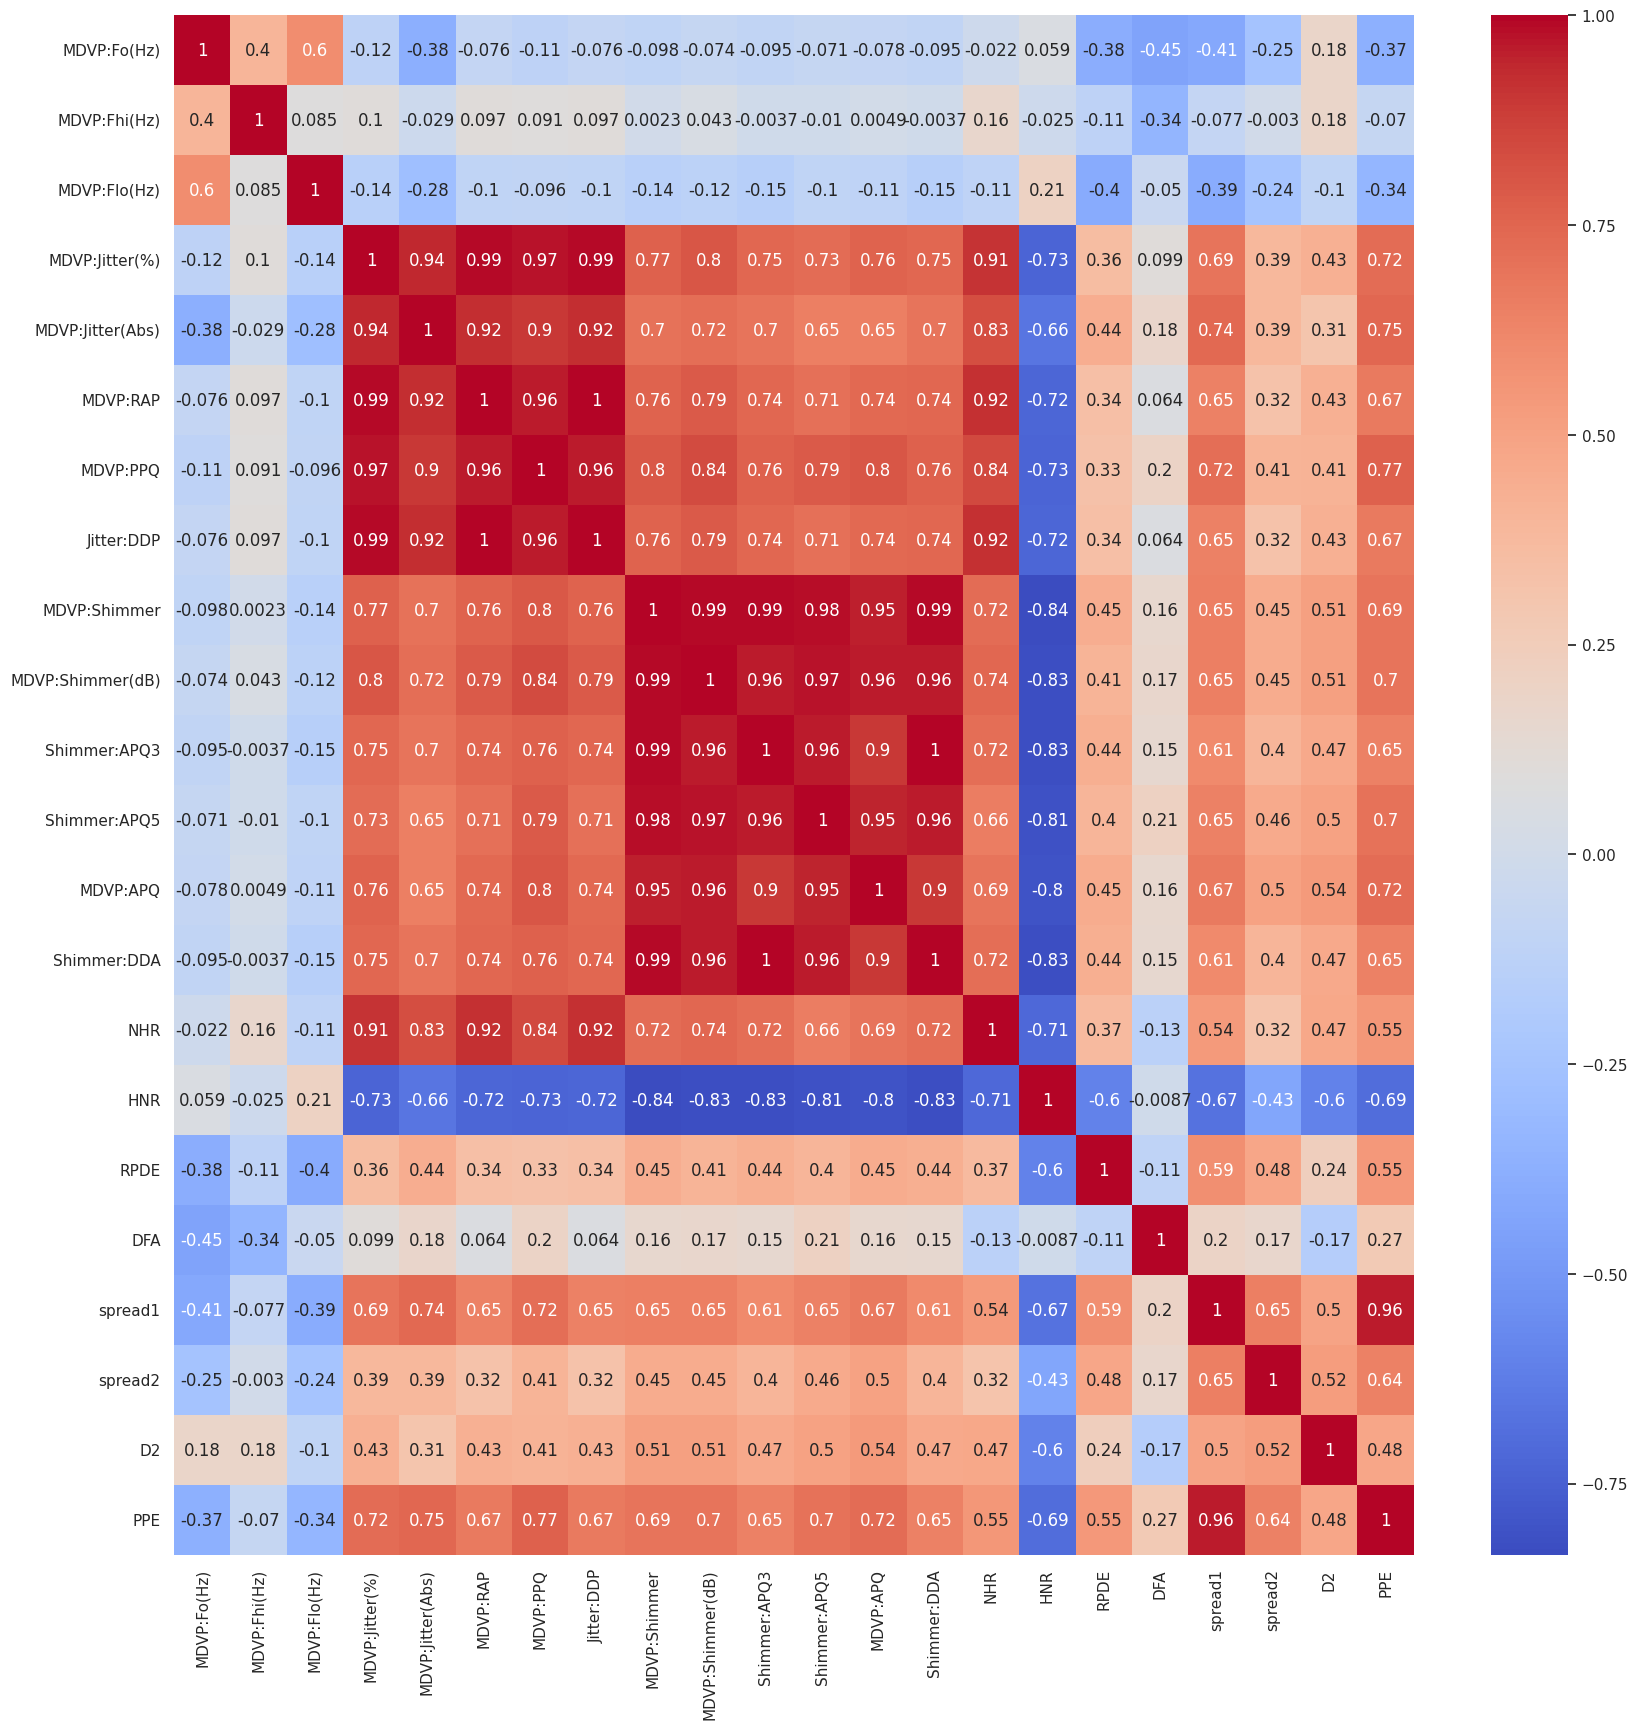

In [ ]:
#find correlation: The resulting heatmap will show the correlation between each pair of columns in the dataset,
# with darker colors indicating higher correlation and lighter colors indicating lower correlation.
plt.figure(figsize=(20,20))
numerical_data = data.select_dtypes(include=['float64'])
corr = numerical_data.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

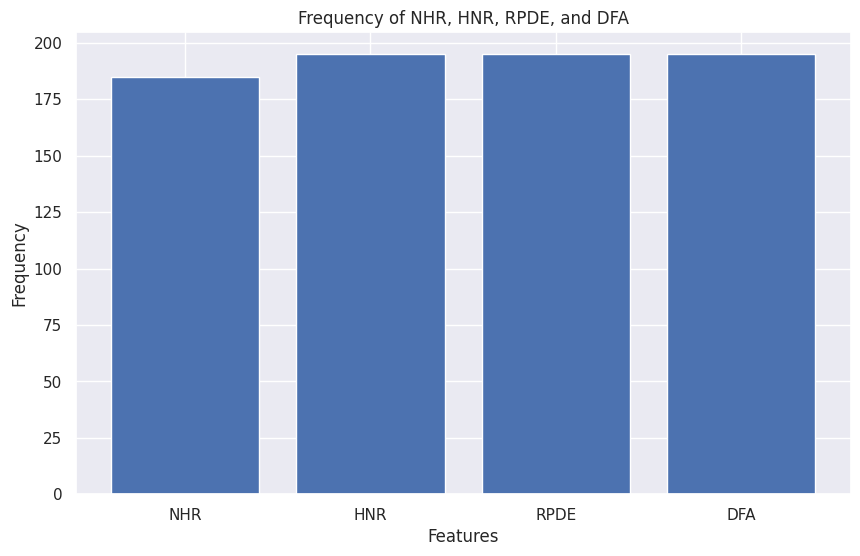

In [ ]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['NHR', 'HNR', 'RPDE', 'DFA'],
         [data['NHR'].value_counts().count(), data['HNR'].value_counts().count(),
          data['RPDE'].value_counts().count(), data['DFA'].value_counts().count()])
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Frequency of NHR, HNR, RPDE, and DFA')
plt.show()

**Step 5: Principle Component Analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95) #PCA algorithm will retain enough components to explain at least 95% of the variance in the data.
x_pca = pca.fit_transform(x)
x_pca.shape

(195, 3)

Model Building: **Logistics Regression implementation**


In [ ]:
pip install pandas scikit-learn numpy matplotlib


In [ ]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df = df.drop(columns=['name'])
X = df.drop(columns=['status'])
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

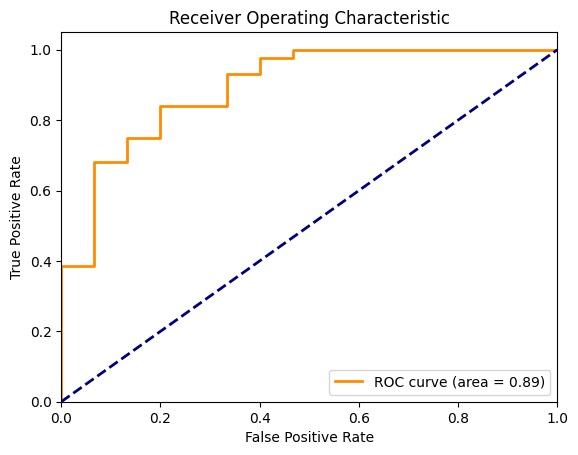

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [ ]:
pip install pandas scikit-learn numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)


In [ ]:
df = df.drop(columns=['name'])

In [ ]:
X = df.drop(columns=['status'])
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 3
False Positives: 2
False Negatives: 1
True Positives: 4


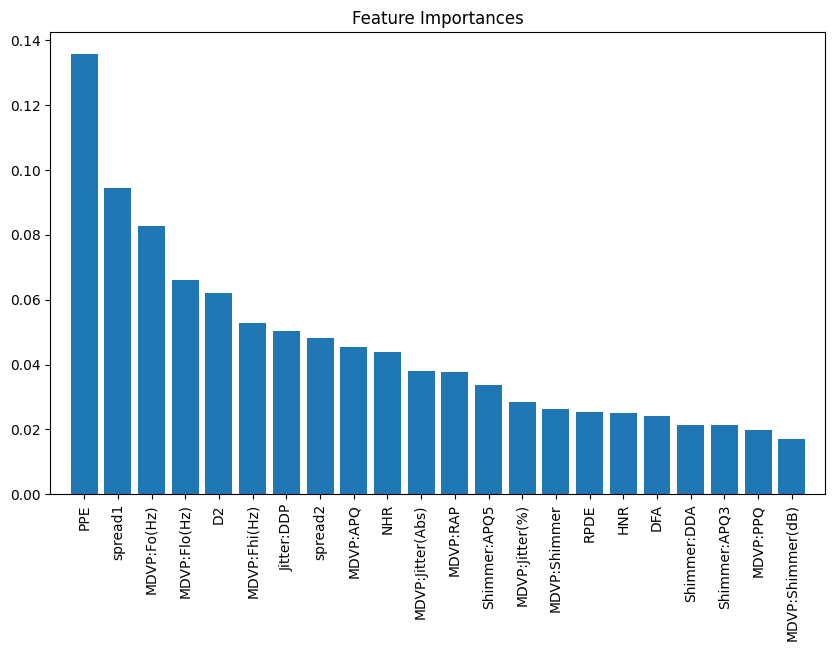

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Confusion Matrix

In [ ]:
import pandas as pd

cm_df = pd.DataFrame(cm, index=['Actual: No Disease', 'Actual: Disease'], columns=['Predicted: No Disease', 'Predicted: Disease'])
print("Confusion Matrix with Labels:")
print(cm_df)

Confusion Matrix with Labels:
                    Predicted: No Disease  Predicted: Disease
Actual: No Disease                      3                   2
Actual: Disease                         1                   4


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [ ]:
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])
# 0: No Disease, 1: Disease

In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3 2]
 [1 4]]


In [ ]:
report = classification_report(y_true, y_pred, target_names=['No Disease', 'Disease'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.75      0.60      0.67         5
     Disease       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



Decision Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
actual = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
cm = confusion_matrix(actual, predicted)
print(cm)

[[3 2]
 [1 4]]


F1 Score

In [ ]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272


Entropy

In [ ]:
import numpy as np


p_positive = 40 / 100
p_negative = 60 / 100


entropy = - (p_positive * np.log2(p_positive) + p_negative * np.log2(p_negative))
print(f"Entropy: {entropy}")

Entropy: 0.9709505944546686
